## Predict whether a client will subscribe (yes/no) a term deposit

In [1]:
#import packages
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt

#import modules
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

#import warning
from warnings import filterwarnings
filterwarnings('ignore')

#get the same results through the notebook
np.random.seed(42)

## Upload data

In [2]:
data = pd.read_csv('C:/Users/ntawi/Downloads/bank/bank-full.csv', sep=';', header=None, skiprows=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data wrangling

In [3]:
mising_values = 'unknown'
columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
          'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
data1 = pd.read_csv('C:/Users/ntawi/Downloads/bank/bank-full.csv', sep=';', skiprows=1, names=columns, na_values='unknown')

In [4]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          44923 non-null object
marital      45211 non-null object
education    43354 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      32191 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     8252 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data1.shape

(45211, 17)

In [7]:
data1.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [8]:
data1['y'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
data1['y'] = data1['y'].astype('category')
data1['y']=data1['y'].cat.codes

In [10]:
data1['housing'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
data1['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [12]:
data1['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [13]:
data1['default'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
data1['contact'].unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [15]:
data1['loan'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
data1['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [17]:
data1['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
data1['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [19]:
#data1.replace('unknown', np.nan, inplace=True)

In [20]:
data1['job'] = data1['job'].astype('category')

In [21]:
data1['marital'] = data1['marital'].astype('category')

In [22]:
data1['default'] = data1['default'].astype('category')

In [23]:
data1['housing'] = data1['housing'].astype('category')

In [24]:
data1['loan'] = data1['loan'].astype('category')

In [25]:
data1['day'] = data1['day'].astype('category')

In [26]:
data1['contact'] = data1['contact'].astype('category')

In [27]:
data1['poutcome'] = data1['poutcome'].astype('category')

In [28]:
data1['education'] = data1['education'].astype('category')

In [29]:
data1['month'] = data1['month'].astype('category')

In [30]:
#bucketize age feature 
data1['new_age'] = pd.cut(data1.age, bins=[0, 25, 50, 75, 100], labels=[1, 2, 3, 4])

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
age          45211 non-null int64
job          44923 non-null category
marital      45211 non-null category
education    43354 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      32191 non-null category
day          45211 non-null category
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     8252 non-null category
y            45211 non-null int8
new_age      45211 non-null category
dtypes: category(11), int64(6), int8(1)
memory usage: 2.6 MB


In [32]:
#data1['pdays'].unique()

In [33]:
data1['y'].unique()

array([0, 1], dtype=int64)

In [34]:
data1.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
new_age          0
dtype: int64

In [35]:
data2 = data1.drop(['duration', 'age'], axis=1)

## Visualize the data to gain insights

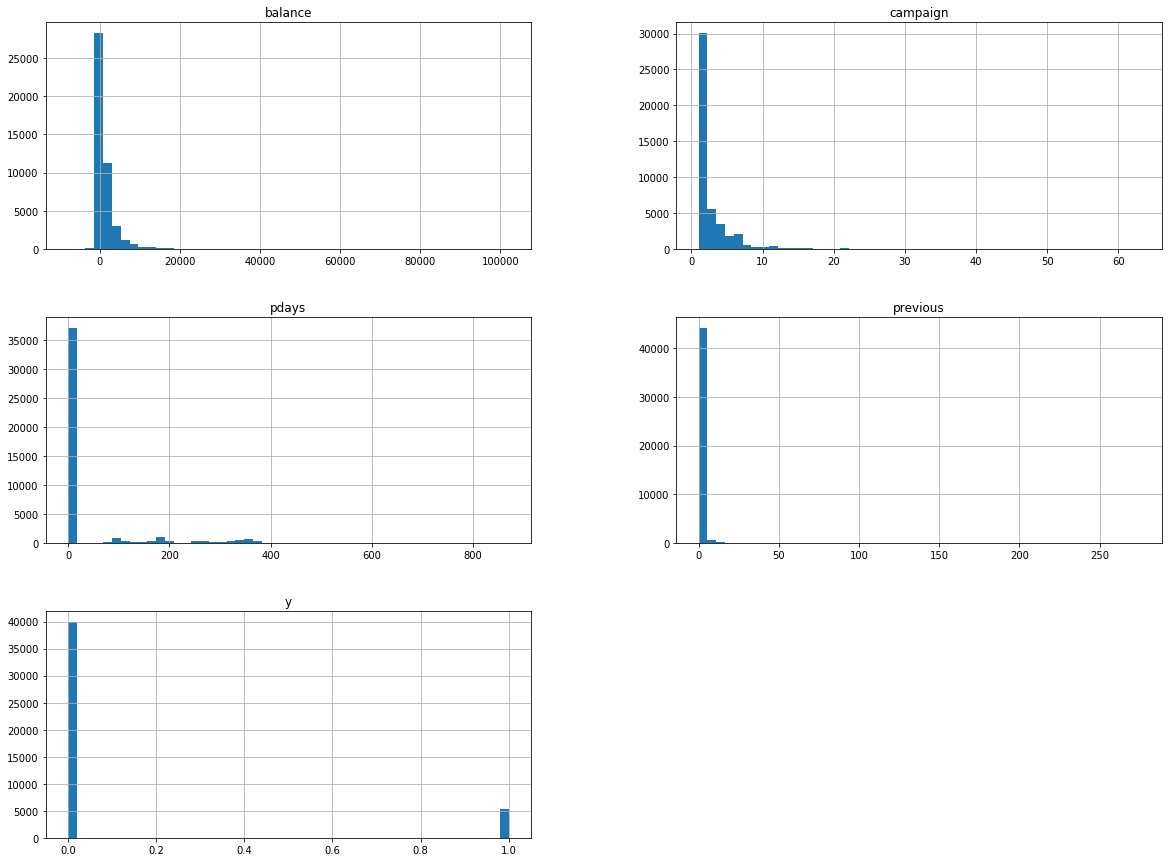

In [36]:
data2.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1, 'bank_correlation')

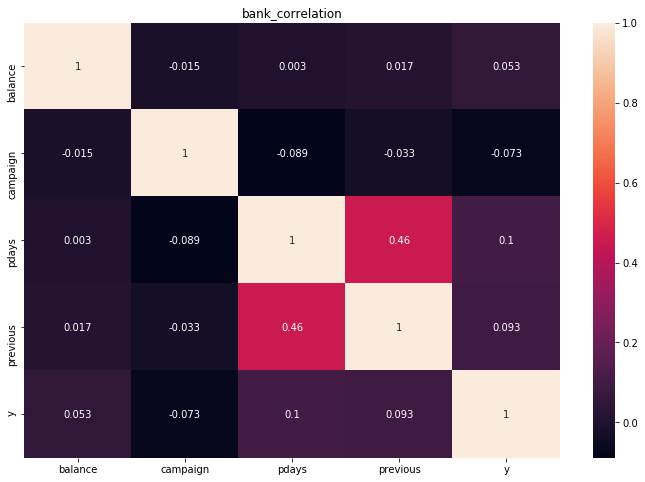

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12, 8))
corr = data2.corr().round(3)
sns.heatmap(corr, annot=True).set_title('bank_correlation')

In [38]:
# alternative coorelation coefficient(Pearson's r)
corr_matrix = data2.corr()
corr_matrix["y"].sort_values(ascending=False)

y           1.000000
pdays       0.103621
previous    0.093236
balance     0.052838
campaign   -0.073172
Name: y, dtype: float64

## Preparing the data for training

In [39]:
data3 = data2.copy()

# separating the feature vecotrs and the target values
X = data3.drop('y', axis =1)
y = data3['y']

X.columns

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome',
       'new_age'],
      dtype='object')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(len(X_train), "train +", len(y_test), "test")

27126 train + 18085 test


## Prepare the data for Machine Learning Algorithms
    . Data cleaning
    . Handling categorical and numeric features
    . Transformers
    . Feature scaling
    . Transformation pipelines

In [41]:
# Create pipeline for both numeric and categorical features
numeric_features = ['campaign', 'pdays', 'previous', 'balance']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['new_age', 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

bank_prepared = preprocessor.fit_transform(data3)

# Append classifier to preprocessing pipeline
# Now we have a full prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

In [42]:
bank_prepared.shape

(45211, 79)

In [43]:
#check model accuracy
clf.fit(X_train, y_train)
print('Accuracy of LogisticRegression on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of LogisticRegression on training set: 0.89


## Select models and train them

In [44]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [45]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=8, 
                                        max_depth=2, random_state=42)
    #gb_clf = GradientBoostingClassifier()
    gb_clf.fit(bank_prepared, y)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(bank_prepared, y)))
#print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  1
Accuracy score (training): 0.892


In [46]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=8, max_depth=2, random_state=42)
#gb_clf2 = GradientBoostingClassifier()
gb_clf2.fit(bank_prepared, y)
bank_predictions = gb_clf2.predict(bank_prepared)


print("Confusion Matrix:")
print(confusion_matrix(y, bank_predictions))

print("Classification Report")
print(classification_report(y, bank_predictions))

Confusion Matrix:
[[39166   756]
 [ 4133  1156]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(n_estimators=100)
rfc_clf.fit(bank_prepared, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
from sklearn.metrics import mean_squared_error

bank_predictions = rfc_clf.predict(bank_prepared)
rfc_mse = mean_squared_error(y, bank_predictions)
rfc_rmse = np.sqrt(rfc_mse)
print(rfc_rmse)

0.0193910981301032


In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfolds = StratifiedKFold(n_splits=10, random_state=42)
print(skfolds)

results = cross_val_score(rfc_clf, bank_prepared, y, cv=skfolds, scoring='neg_mean_squared_error')
print(results.mean())

StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
-0.5862638866141262


In [50]:
from sklearn.metrics import mean_absolute_error

rfc_mae = mean_absolute_error(y, bank_predictions)
print(rfc_mae)

0.0003760146866912919


In [51]:
print("Confusion Matrix:")
print(confusion_matrix(y, bank_predictions))

print("Classification Report")
print(classification_report(y, bank_predictions))

Confusion Matrix:
[[39920     2]
 [   15  5274]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211



In [52]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

#linsvc_clf = LinearSVC(C=1, loss='hinge')
#linsvc_clf.fit(bank_prepared, y)

polynomial_svm_clf = Pipeline((
        ('poly_features', PolynomialFeatures(degree=3)),
        ('svm_clf', LinearSVC(C=10, loss='hinge'))
    ))

polynomial_svm_clf.fit(bank_prepared, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [53]:
from sklearn.metrics import mean_squared_error

#bank_predictions = linsvc_clf.predict(bank_prepared)
#linsvc_mse = mean_squared_error(y, bank_predictions)
#linsvc_rmse = np.sqrt(linsvc_mse)
#print(linsvc_rmse)

bank_predictions = polynomial_svm_clf.predict(bank_prepared)
polynomial_svm_mse = mean_squared_error(y, bank_predictions)
polynomial_svm_rmse = np.sqrt(polynomial_svm_mse)
print(polynomial_svm_rmse)

0.24054526544601804


In [54]:
from sklearn.metrics import mean_absolute_error

#linsvc_mae = mean_absolute_error(y, bank_predictions)
#print(linsvc_mae)

polynomial_svm_mae = mean_absolute_error(y, bank_predictions)
print(polynomial_svm_mae)

0.057862024728495276


In [55]:
print("Confusion Matrix:")
print(confusion_matrix(y, bank_predictions))

print("Classification Report")
print(classification_report(y, bank_predictions))

Confusion Matrix:
[[38747  1175]
 [ 1441  3848]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     39922
           1       0.77      0.73      0.75      5289

    accuracy                           0.94     45211
   macro avg       0.87      0.85      0.86     45211
weighted avg       0.94      0.94      0.94     45211



## Fine-tune your model

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10)}


rfg_clf = RandomForestClassifier(n_estimators=100)
grid_search = GridSearchCV(rfg_clf, param_grid, cv=5, 
                           error_score='raise-deprecating',
                           return_train_score=False,
                           scoring='neg_mean_squared_error', verbose=0)

grid_search.fit(bank_prepared, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [57]:
grid_search.best_params_

{'max_depth': 3}

In [58]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.34141551352318555 {'max_depth': 3}
0.343192469291361 {'max_depth': 4}
0.35447885816764446 {'max_depth': 5}
0.39867733810126116 {'max_depth': 6}
0.46688106164851034 {'max_depth': 7}
0.47386403481130196 {'max_depth': 8}
0.5140523812804011 {'max_depth': 9}


In [60]:
final_model = grid_search.best_estimator_

X_test = data3.drop('y', axis=1)
y_test = data3['y'].copy()

X_test_prepared = preprocessor.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
print(final_mse)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.11698480458295547
0.34203041470453394
